## Day 33 Lecture 2 Assignment

In this assignment, we will learn about non linear SVM models. We will use the heart disease dataset loaded below and analyze the model generated for this dataset.

In [51]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
heart = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/framingham_heart_disease.csv')

In [39]:
heart.shape

(4238, 16)

In [40]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


This dataset helps us predict the probability of coronary heart diease (CHD) in the next 10 years given the risk factors for each subject in the study. Our target variable is `TenYearCHD`.

We'll start off by removing any rows containing missing data.

In [41]:
# answer below:
heart.dropna(inplace=True)

In [42]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


Then, we split the data into train and test with 20% of the data in the test subset.

In [43]:
# answer below:
X = heart.drop('TenYearCHD', axis=1)
y = heart.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

We will then scale the data using the standard scaler. Do this in the cell below.

In [44]:
# answer below:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

Generate a polynomial SVC model and a RBF SVC model. Compare the performance, and the runtime, for the two models.

In [62]:
# answer below:
svm = SVC(C=0.01, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_pred = svm.predict(X_test)

accuracy_score(y_test, y_pred)

0.8565573770491803

In [61]:
svm_poly = SVC(C=0.01, kernel='poly')
svm_poly.fit(X_train, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
y_pred = svm_poly.predict(X_test)

accuracy_score(y_test, y_pred)

0.8565573770491803

Which model overfits more? How would you improve the overfitting?

Look at a classification report and confusion matrix. How does the class balance affect your results?

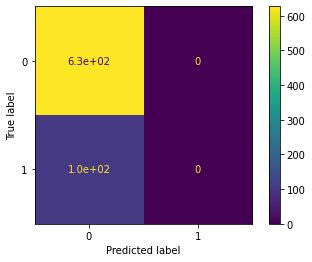

In [56]:
# answer below:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test)


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       627
           1       0.00      0.00      0.00       105

    accuracy                           0.86       732
   macro avg       0.43      0.50      0.46       732
weighted avg       0.73      0.86      0.79       732



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


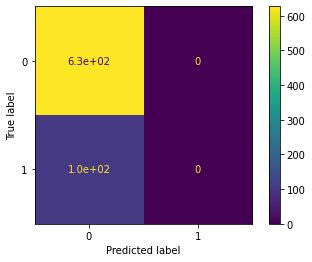

In [58]:
plot_confusion_matrix(svm_poly, X_test, y_test)